# Loan calculator

Version 1.0

## Imports

In [78]:
# For all functions
import numpy as np

# For graphs
import matplotlib.pyplot as plt
%matplotlib inline


# For table formatting
import locale 
from tabulate import tabulate

## Functions

In [114]:
def PMT(c:int =1000, r:float=1.0, per:int=1, fper:int=1):
    """ Calculates the payment for a loan based on constant payments and a constant interest rate.
    Args:
        - Pv : Present Value (starting value of the loan)
        - r : Annual Percent Rate (APR)
        - fn : fraction of period of interest periods per year
        - n : number of years
    Returns:
        float: PMT value
    """
    nper = per * fper # number of periodic payment
    pir = r / fper # Periodic Interest Rate
    PMT = (c * pir) / (1 - (1 + pir)**(-nper))

    return -PMT



def IPMT(pmt:int, r:float, per:int, fper:int, c:int):    
    """Calculate IPMT
    Args:
        - c is PMT()
        - r is Annual Rate
        - per is Payment Number
        - pv is Present Value
    Returns:
        float: IPMT value
    """
     
    pir = r / fper # Periodic Interest Rate
    
    
    IPMT = -(pmt * ((1 + pir)**(per-1) - 1) / pir + c * (1 + pir)**(per-1)) * pir

    return IPMT


def PPMT(pmt:int, r:float, per:int, fper:int, c:int):
    """Calculate PPMT
    Args:
        - c is PMT()
        - r is Rate
        - per is Payment Number
        - pv is Present Value
    Returns:
        float: PPMT value
    """
    
    pir = r / fper # Periodic Interest Rate
    
    ppmt = pmt+(pmt * ((1 + pir)**(per-1) - 1) / pir + c * (1 + pir)**(per-1)) * pir

    return ppmt


def loan_calculation(c:int, r:float, per:int, fper:int):
    """_summary_
    Args:
        Where c is PMT()
        Where r is Rate
        Where per is Payment Number
        Where pv is Present Value
    Returns:
        _type_: _description_
    """
    
    pmt = PMT(c=c, r=r, per=per, fper=fper ) 
    
    nper = per * fper # number of periodic payment
    
    list_per = []
    list_ipmt = []
    list_ppmt = []
    list_pmt = []
    
    for i in range(nper):
        
        ipmt = IPMT(pmt=pmt, r=r, per=i, fper=fper, c=c) 
        ppmt = PPMT(pmt=pmt, r=r, per=i, fper=fper, c=c) 
        
        list_per.append(i +1) # To start from period 1 instead of zero
        list_ipmt.append(-ipmt)
        list_ppmt.append(-ppmt)
        list_pmt.append(-pmt)
    
    return list_per, list_ipmt, list_ppmt, list_pmt


def find_per_cumul_interest(per:list, ipmt:list, threshold:float=0.5):
    
    ipmt_target = np.sum(ipmt) * threshold
    ipmt_cum = np.cumsum(ipmt)
    
    for p, i in zip(per, ipmt_cum):
        
        if i > ipmt_target:
            return p
            break
        
        

def unformated_loan_table(per:list, ipmt:list, ppmt:list, pmt:list):
    
    # To use default Operating Système regional settings
    locale.setlocale(locale.LC_ALL, '')
    
    # Headers
    headers_FR = ["Echéance", "Mensualité\néchéance", "Capital\néchéance", "Intérêts\néchéance", "Capital\ncumulé", "Intérêts\ncumulé", "Capital\nrestant", "Intérêts\nrestants"]
    headers_ENG = ["Period", "Payment\nPeriodic", "Principal\nPeriodic", "Interest\nPeriodic", "Principal\nCumulated", "Interest\nCumulated", "Principal\nremaining", "Interest\nremaining"]

    
    # Initialization of the list
    loan_table = []

    
    # Loop
    for i in range(1, max(per) ):
        
        periodic_payment = pmt[i]
        principal_periodic = ppmt[i]
        interest_periodic = ipmt[i]
        principal_cumulated = np.sum(ppmt[:i+1])
        interest_cumulated = np.sum(ipmt[:i+1])
        principal_remaining = np.sum(ppmt) - principal_cumulated
        interest_remaining = np.sum(ipmt) - interest_cumulated

        # Built of the periodic line
        periodic_line = [
            i, 
            locale._format('%.2f', periodic_payment ),
            locale._format('%.2f', principal_periodic ),
            locale._format('%.2f', interest_periodic ),
            locale._format('%.2f', principal_cumulated ),
            locale._format('%.2f', interest_cumulated ),
            locale._format('%.2f', principal_remaining ),
            locale._format('%.2f', interest_remaining )
            ]
    
        # Add of the periodic line inside the table
        loan_table.append(periodic_line)
    
    print(tabulate(loan_table, headers = headers_FR, tablefmt="fancy_grid"))
    
    return loan_table


def formated_loan_table(per:list, ipmt:list, ppmt:list, pmt:list, table_size:int=12):
    
    # To use default Operating Système regional settings
    locale.setlocale(locale.LC_ALL, '')
    
    # Headers
    headers_FR = ["Echéance", "Mensualité\néchéance", "Capital\néchéance", "Intérêts\néchéance", "Capital\ncumulé", "Intérêts\ncumulé", "Capital\nrestant", "Intérêts\nrestants"]
    headers_ENG = ["Period", "Payment\nPeriodic", "Principal\nPeriodic", "Interest\nPeriodic", "Principal\nCumulated", "Interest\nCumulated", "Principal\nremaining", "Interest\nremaining"]

    
    # First Initialization of the list
    loan_table = []

    # Table size definition
    list_per_cut = np.arange(0, np.max(per), table_size)
    period_start = 0
    period_end = 0
    
    # Loop
    for i in range(min(per), max(per) ):
        
        period_start=period_end
        
        periodic_payment = pmt[i]
        principal_periodic = ppmt[i]
        interest_periodic = ipmt[i]
        principal_cumulated = np.sum(ppmt[:i+1])
        interest_cumulated = np.sum(ipmt[:i+1])
        principal_remaining = np.sum(ppmt) - principal_cumulated
        interest_remaining = np.sum(ipmt) - interest_cumulated

        # Built of the periodic line
        periodic_line = [
            i, 
            locale._format('%.2f', periodic_payment ),
            locale._format('%.2f', principal_periodic ),
            locale._format('%.2f', interest_periodic ),
            locale._format('%.2f', principal_cumulated ),
            locale._format('%.2f', interest_cumulated ),
            locale._format('%.2f', principal_remaining ),
            locale._format('%.2f', interest_remaining )
            ]
          
        if not i in list_per_cut:

            # Add of the periodic line inside the table
            loan_table.append(periodic_line)
            
            
        if i in list_per_cut:
            
            period_end = i
            
            # Add of the periodic line inside the table
            loan_table.append(periodic_line)

            print(tabulate(loan_table, headers = headers_FR, tablefmt="fancy_grid"))
            print("Total périodes : ",period_start, " - ", period_end, '-' * 78)
            print("Capital cumulé : ", locale._format('%.2f', principal_cumulated ))
            print("Intérêts cumulés : ", locale._format('%.2f', interest_cumulated ))
            print('-' * 105)
            print(" ")
            
            loan_table = []

    return "End"

## Global Variables

In [3]:
c1 = 100000 # Capital
r1 = 0.0300 # Annual Interest rate
fper1 = 12 # Number of periodic payments (number of months per year)
per1 = 25 # Number of years 
n1 = 300 # Specific period 

## Loan calculation

In [4]:
pmt1 = PMT(c=c1, r=r1, per=per1, fper=fper1 ) 
ipmt1 = IPMT(pmt=pmt1, r=r1, per=n1, fper=fper1, c=c1) 
ppmt1 = PPMT(pmt=pmt1, r=r1, per=n1, fper=fper1, c=c1) 

print( pmt1 )
print( ipmt1)
print( ppmt1 )

-474.21131385767984
-1.1825718550066087
-473.02874200267325


In [115]:
list_per, list_ipmt, list_ppmt, list_pmt = loan_calculation(c=c1, r=r1, per=per1, fper=fper1)

# Display samples
print('Last period number : ', max(list_per))
print('3 firsts periods numbers : ', list_per[:3])
print('3 lasts periods numbers : ', list_per[-3:])
print('3 firsts periodic payments : ', list_pmt[:3])
print('3 lasts periodic payments : ', list_pmt[-3:])
print('3 firsts periodic interest : ', list_ipmt[:3])
print('3 lasts periodic interest : ', list_ipmt[-3:])
print('3 firsts periodic principal : ', list_ppmt[:3])
print('3 lasts periodic principal : ', list_ppmt[-3:])
print('Total payments : ', np.sum(list_pmt))
print('Total interest : ', np.sum(list_ipmt))
print('Total principal : ', np.sum(list_ppmt))

Last period number :  300
3 firsts periods numbers :  [1, 2, 3]
3 lasts periods numbers :  [298, 299, 300]
3 firsts periodic payments :  [474.21131385767984, 474.21131385767984, 474.21131385767984]
3 lasts periodic payments :  [474.21131385767984, 474.21131385767984, 474.21131385767984]
3 firsts periodic interest :  [250.55913045849795, 250.0, 249.43947171535584]
3 lasts periodic interest :  [4.712622476744072, 3.5388757482916846, 2.362194653018232]
3 firsts periodic principal :  [223.6521833991819, 224.21131385767984, 224.771842142324]
3 lasts periodic principal :  [469.4986913809358, 470.67243810938817, 471.84911920466163]
Total payments :  142263.39415730393
Total interest :  42512.77071590531
Total principal :  99750.62344139864


## Loan Formatting

In [ ]:
# unformated_loan_table(per=list_per, ipmt=list_ipmt, ppmt=list_ppmt, pmt=list_pmt)
formated_loan_table(per=list_per, ipmt=list_ipmt, ppmt=list_ppmt, pmt=list_pmt, table_size=12)

In [177]:
def drawgraph(per:list, ipmt:list, ppmt:list, pmt:list):

    fig, ax = plt.subplots(figsize=(8,8))

    colors = ['#85c1e9', '#f8c471']
    per_max = int(max(per))
    pmt_max = int(np.sum(pmt))
    ipmt_max = int(np.round(np.sum(ipmt)))
    ppmt_max = int(np.round(np.sum(ppmt)))
    pmt_50 = int(np.round(pmt_max * 0.50 , 0))
    pmt_75 = int(np.round(pmt_max * 0.75 , 0))
    ipmt_75 = int(np.round(ipmt_max * 0.75 , 0))
    ppmt_75 = int(np.round(ppmt_max * 0.75 , 0))
    per_75 = int(np.round(per_max * 0.75 , 0))

    ax.plot(ipmt, label='interest', alpha=0.5, linewidth=4, color=colors[1])
    ax.plot(ppmt, label='capital', alpha=0.8, linewidth=4, color=colors[0])

    plt.xlabel('Periods')
    plt.ylabel('Amount')
    plt.legend()
    plt.title('Loan evolution')
    plt.show();
    
    return

def drawgraphcum(per:list, ipmt:list, ppmt:list, pmt:list):

    fig, ax = plt.subplots(figsize=(8,8))

    colors = ['#85c1e9', '#f8c471']
    per_max = int(max(per))
    pmt_max = int(np.sum(pmt))
    ipmt_max = int(np.round(np.sum(ipmt)))
    ppmt_max = int(np.round(np.sum(ppmt)))
    #pmt_50 = int(np.round(pmt_max * 0.50 , 0))
    pmt_75 = int(np.round(pmt_max * 0.75 , 0))
    #ipmt_50 = int(np.round(ipmt_max * 0.5 , 0))
    #ipmt_75 = int(np.round(ipmt_max * 0.75 , 0))
    ppmt_75 = int(np.round(ppmt_max * 0.75 , 0))
    per_75 = int(np.round(per_max * 0.75 , 0))
    
    per_ipmt_target = find_per_cumul_interest(per=per, ipmt=ipmt, threshold=0.5)

    ax.fill_between(per, np.cumsum(ipmt), label='interest', alpha=0.5, linewidth=4, color=colors[1])
    ax.fill_between(per, np.cumsum(ppmt), label='capital', alpha=0.8, linewidth=4, color=colors[0])

    ax.annotate('Capital', (per_75, ppmt_75), size=12, color='white', weight='bold', bbox=dict(boxstyle='round', color=colors[0], pad=0.6))
    ax.annotate('Interest', (per_75, pmt_75), size=12, color='white', weight='bold', bbox=dict(boxstyle='round', color=colors[1], pad=0.6))

    ax.axvline(x=per_ipmt_target, color='#D3D3D3', linestyle='--')

    plt.xlabel('Periods')
    plt.ylabel('Amount')
    #plt.legend()
    plt.title('Loan evolution')
    plt.show();
    
    return


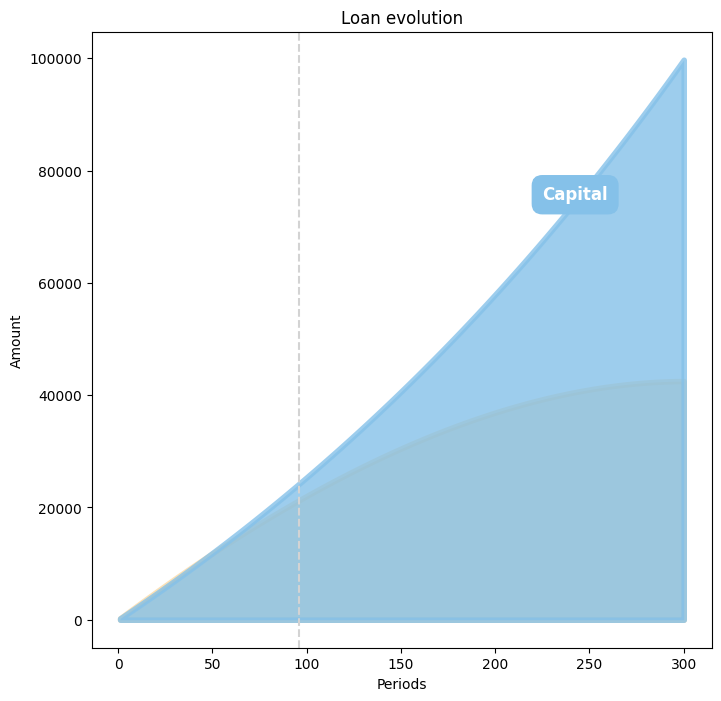

In [178]:
#drawgraph(per=list_per, ipmt=list_ipmt, ppmt=list_ppmt, pmt=list_pmt)
drawgraphcum(per=list_per, ipmt=list_ipmt, ppmt=list_ppmt, pmt=list_pmt)